## Dominant Color Extraction for Image Segmentation
- **Image Segmentation**
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

<img src="example.png" alt="Color Extraction" style="width: 800px;"/>



Fig : Bishop, Pattern Recognition and ML

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.cluster import KMeans

In [2]:
im =  cv2.imread('elephant.jpg') #Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
im.shape

(330, 500, 3)

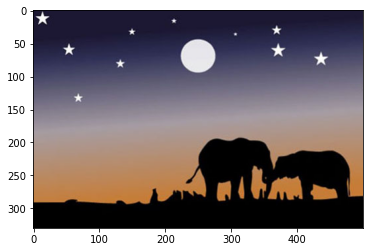

In [3]:
plt.imshow(im) # as RGB Format
plt.show()

In [11]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
all_pixels.shape

(165000, 3)

In [7]:
dominant_colors = 4
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(n_clusters=4)

In [10]:
centers = km.cluster_centers_
centers = np.array(centers,dtype='uint8')
centers

array([[ 38,  35,  64],
       [175, 145, 128],
       [ 99,  95, 118],
       [  1,   0,   1]], dtype=uint8)

### Plot what all colors are these ?

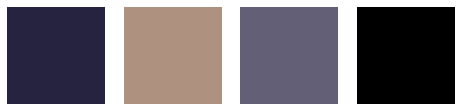

In [12]:
i = 1
plt.figure(0,figsize=(8,2))
colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
plt.show()

## Segmenting Our Original Image

In [14]:
new_img = np.zeros((330*500,3),dtype='uint8')
new_img.shape

(165000, 3)

In [15]:
colors

[array([38, 35, 64], dtype=uint8),
 array([175, 145, 128], dtype=uint8),
 array([ 99,  95, 118], dtype=uint8),
 array([1, 0, 1], dtype=uint8)]

In [16]:
km.labels_

array([0, 0, 0, ..., 3, 3, 3])

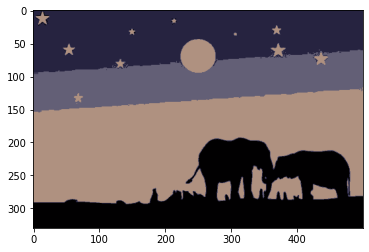

In [17]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()